# Swahili Audio Classification - Exploratory Data Analysis

The challenge is to classify wave files into 12 categories using machine learning. The wave files contain people speaking one word from a list of 12 swahili words. The words are spoken by different people in different locations. 

In this notebook, some of the training data is shown and compared. Each audio file is different and each speaker is pronouncing the words differntly. To get a feeling for the data, some examples are shown for each word. 

Data difficulties:
* The audio files usually contain silence at the beginning and end. 
* Some files are disturbed by background noise. 
* Sometimes, the speaker was interrupted and repeated the word.

**Contents**
* Examples of wrongly labeled data or data containing wrong information.
* Overview of the data
* Samples of audio files
* Waveplots for three examples of each word
* Corresponding spectrograms for these words 

|Swahili|English|
|---|---|
| ndio | yes |
| hapana | no |
| moja | one |
| mbili | two |
| tatu | three |
| nne | four |
| tano | five |
| sita | six |
| saba | seven |
| nane | eight |
| tisa | nine |
| kumi | ten |

## Examples for wrong data 

During the challenge I found several audio files that contain wrong data or are false labeled. Here are the files I found:

* id_p0w83k2cxaq7 (tatu) sais different words, nothing that is part of the challenge.
* id_qbkjs5jaji4s (ndio) sais 'yes'
* id_bkbq9rsmuq8j (saba) sais 'seven'
* id_toljkyjcpo2g (nane) someone randomly talking
* id_v2okjqke4zmb (nane) saying nne instead of nane

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import random
import IPython.display as ipd

In [2]:
train_df = pd.read_csv('data/Train.csv')

In [3]:
train_df.head()

Word_id Swahili_word English_translation
0  id_v8rz06e6rv31.wav        mbili                 two
1  id_vmbwicdpfn68.wav         tatu               three
2  id_injlouhxg1hg.wav         ndio                 yes
3  id_gdq23p6xgzya.wav          nne                four
4  id_lpstklz51zpz.wav         nane               eight

In [4]:
train_df['Swahili_word'].value_counts()
# perfectly balanced

mbili     350
tatu      350
ndio      350
nne       350
nane      350
hapana    350
sita      350
tisa      350
moja      350
saba      350
tano      350
kumi      350
Name: Swahili_word, dtype: int64

In [5]:
# Sample some words
for word in random.sample(train_df['Swahili_word'].unique().tolist(), 6):
    sample = train_df[train_df['Swahili_word'] == word]['Word_id'].sample(1).values[0]
    display(word, sample, ipd.Audio('data/Swahili_words/'+ sample ))

'tisa'

'id_muq4ob47z6st.wav'

'ndio'

'id_y5x3le7iyggo.wav'

'kumi'

'id_wtxzjlyczxc0.wav'

'saba'

'id_6h1x1m5ba6jl.wav'

'tano'

'id_qhlxzool2zt7.wav'

'moja'

'id_fxywi03j4a6i.wav'

## Compare 3 samples for each word

In [6]:
dict_samples=dict()
for word in train_df['Swahili_word'].unique().tolist():
    sample = train_df[train_df['Swahili_word'] == word]['Word_id'].sample(3).values[:]
    dict_samples[word] = sample

In [7]:
dict_samples

{'mbili': array(['id_cw0zwcnsoftg.wav', 'id_z4ju3oaexhpl.wav',
        'id_vk8z1hxjrqpl.wav'], dtype=object),
 'tatu': array(['id_yh044925gjg4.wav', 'id_3njxhyz4ieuh.wav',
        'id_tgngyxhsdqb0.wav'], dtype=object),
 'ndio': array(['id_9492e87ffbmc.wav', 'id_db6irdplascn.wav',
        'id_1p2hi8wt0qpo.wav'], dtype=object),
 'nne': array(['id_dpvx946ai9sq.wav', 'id_kubwxnuuy6mi.wav',
        'id_rf3zvvvbnhq2.wav'], dtype=object),
 'nane': array(['id_a13dy9i8zncc.wav', 'id_xgskggjqxeiv.wav',
        'id_cs4w6oqhdi9v.wav'], dtype=object),
 'hapana': array(['id_p8z4fj1xzuz9.wav', 'id_3sq66j3fuo4l.wav',
        'id_v18ec9lsogn0.wav'], dtype=object),
 'sita': array(['id_wu4azm7zz883.wav', 'id_t22q3pi1hoc5.wav',
        'id_07ppov73yl2q.wav'], dtype=object),
 'tisa': array(['id_sowf8poicxap.wav', 'id_pqt5x5fl4mp2.wav',
        'id_clg37pla3snz.wav'], dtype=object),
 'moja': array(['id_rsyd6inzcj33.wav', 'id_nh2s1tlgvy8h.wav',
        'id_u9yd2fuutjxq.wav'], dtype=object),
 'saba': array(['

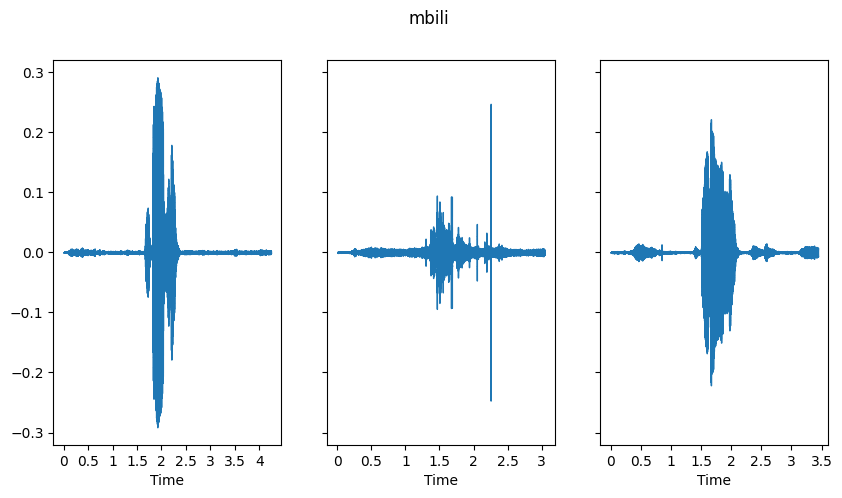

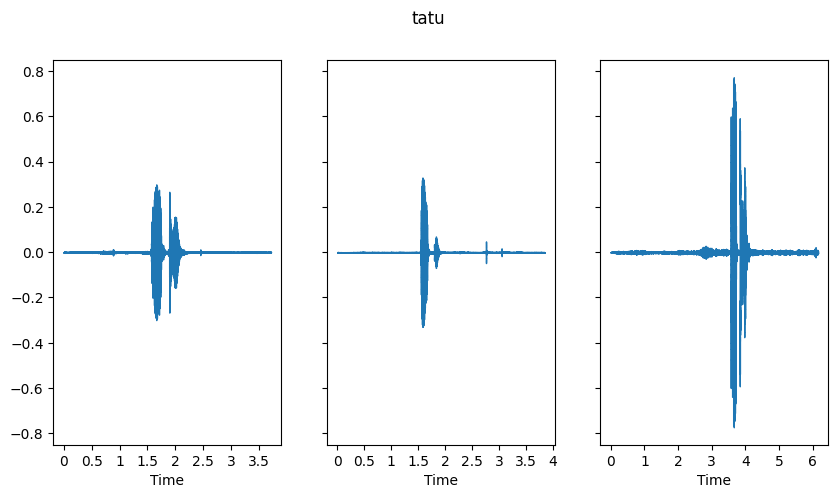

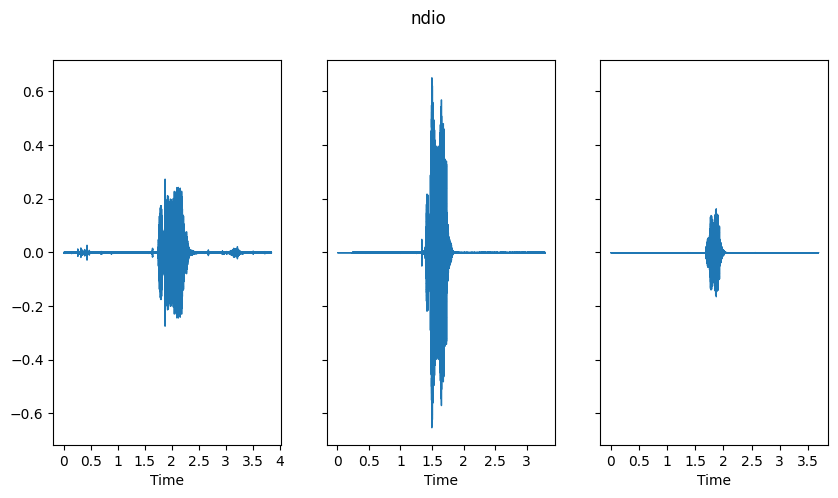

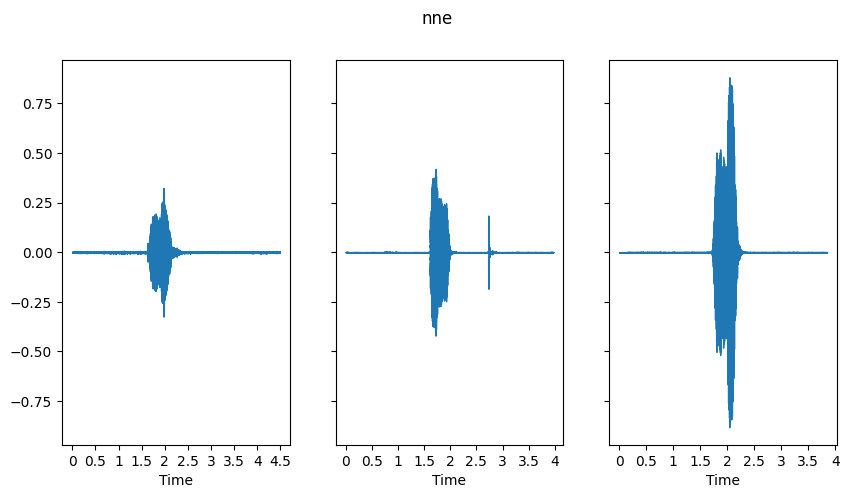

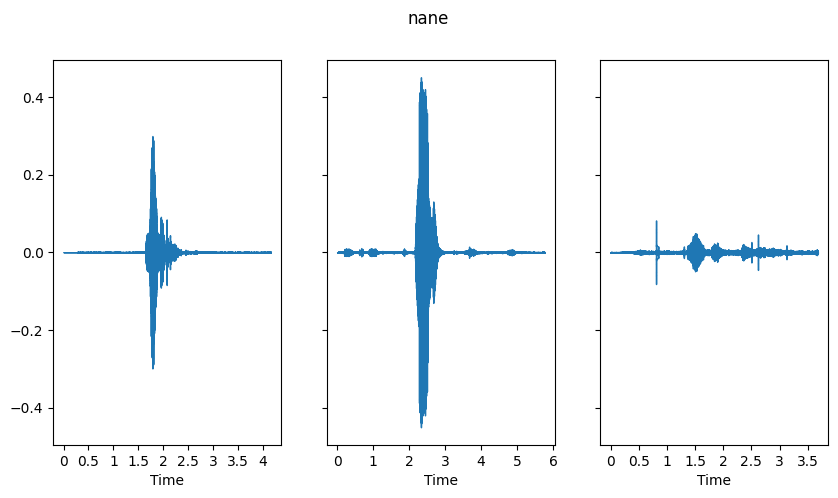

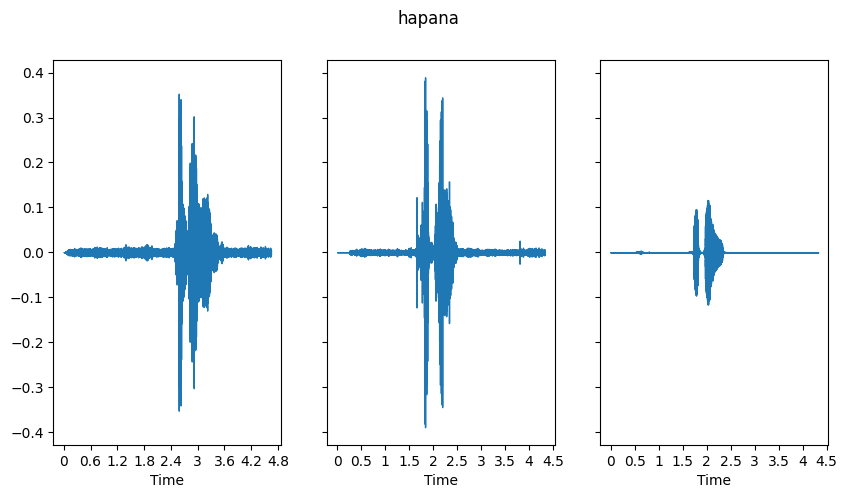

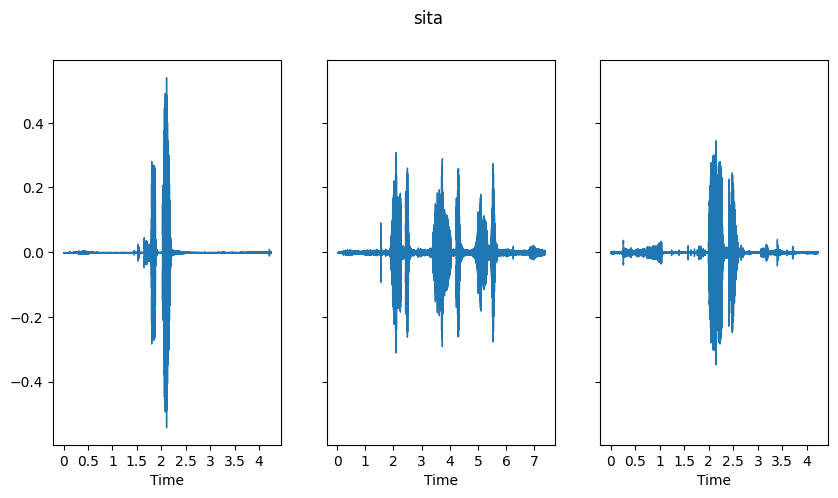

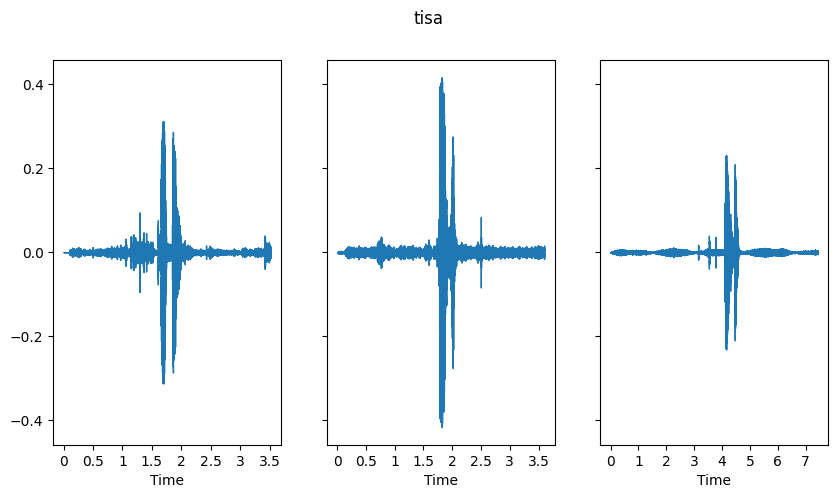

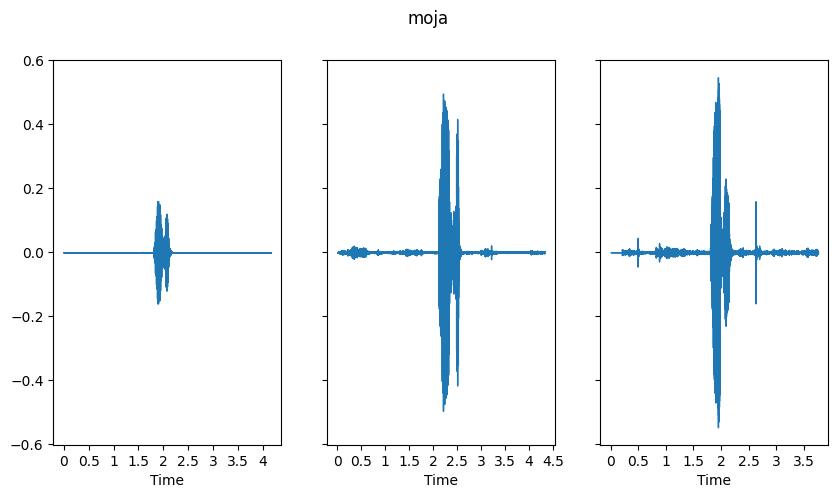

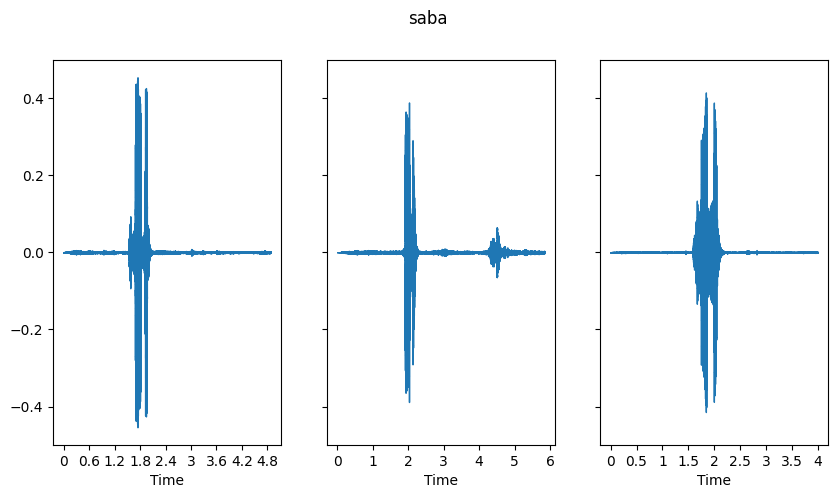

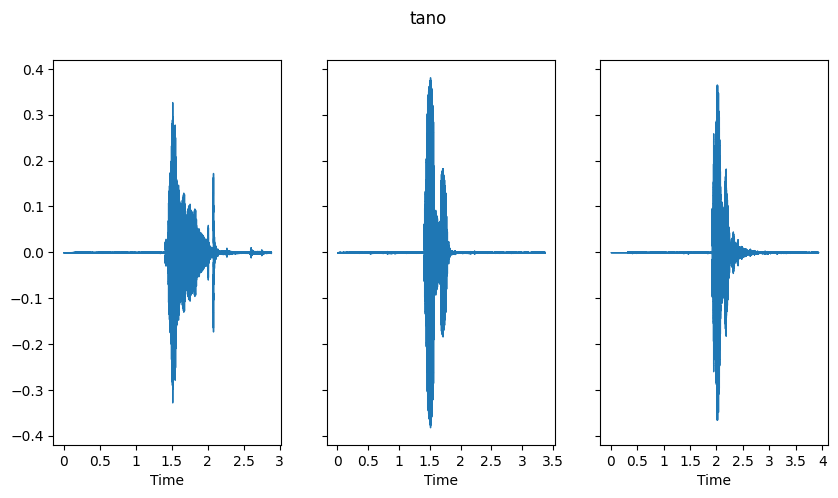

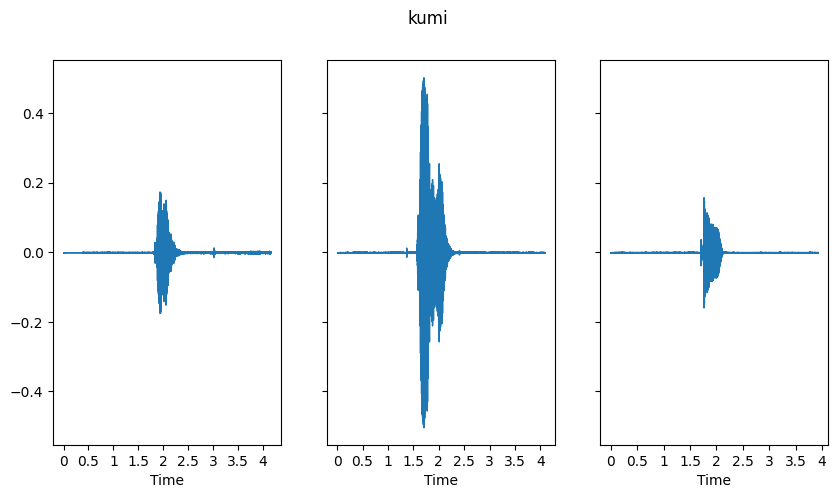

In [8]:
# show three wavefiles for all words in time domain, for easy comparison between the words
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        img = librosa.display.waveshow(x, sr=sr, ax=ax[i])
        i+=1


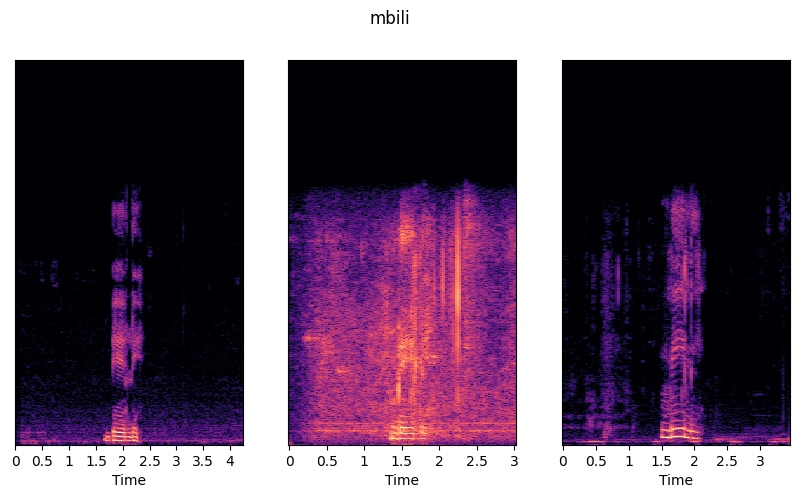

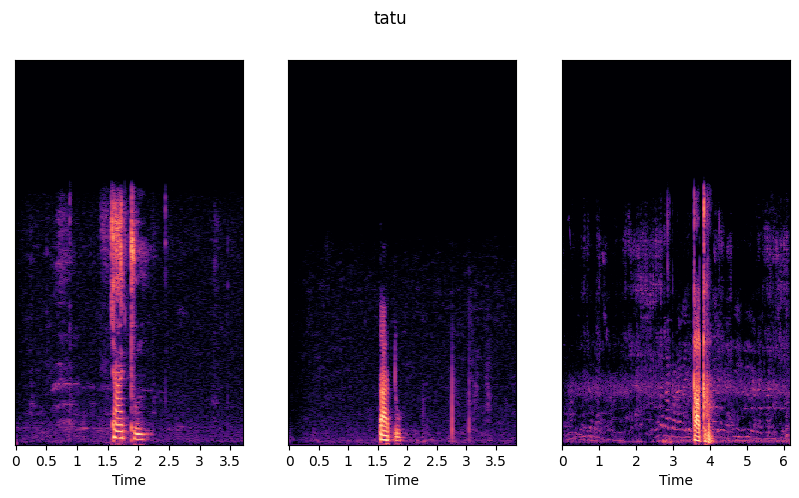

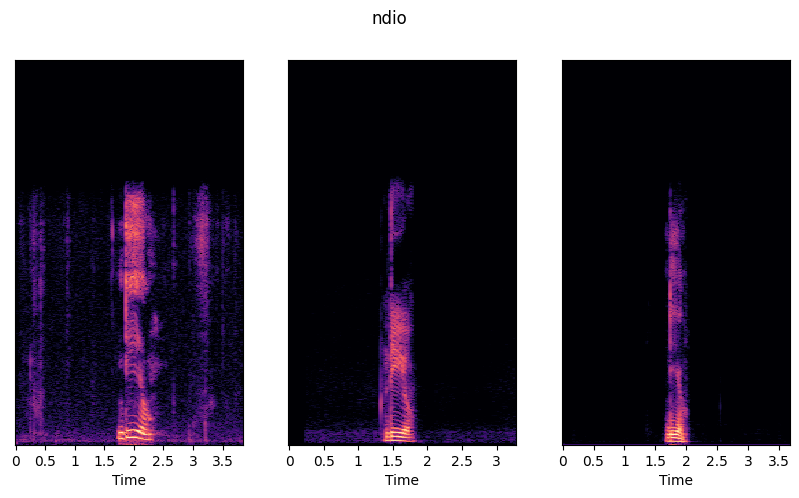

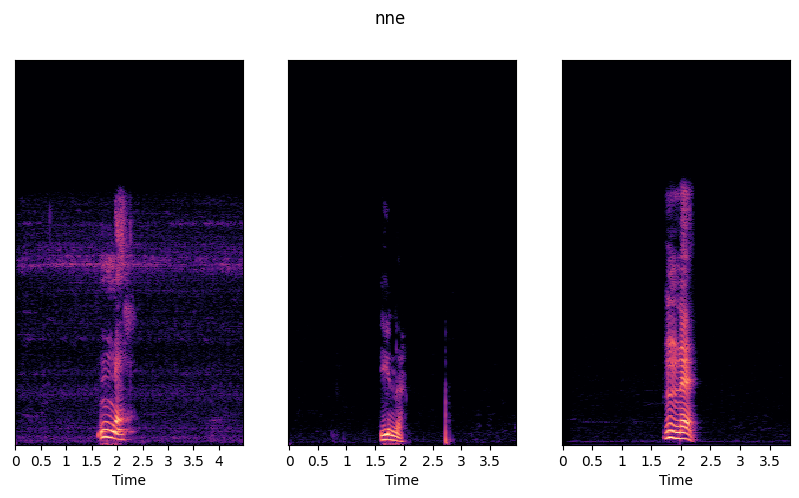

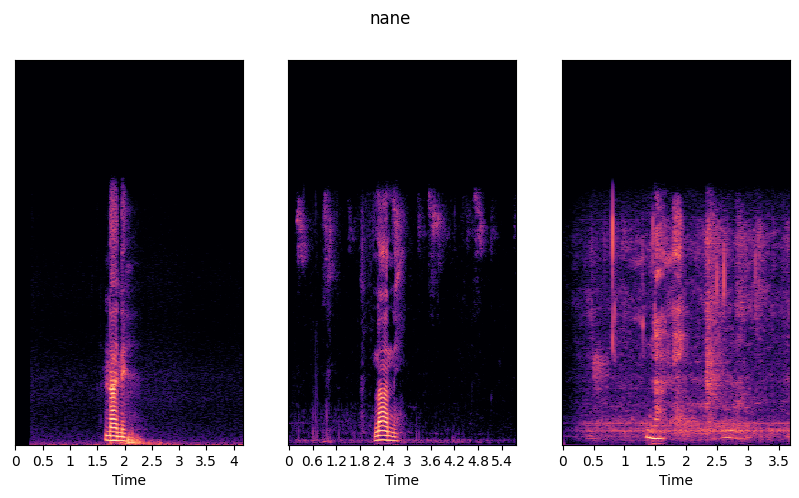

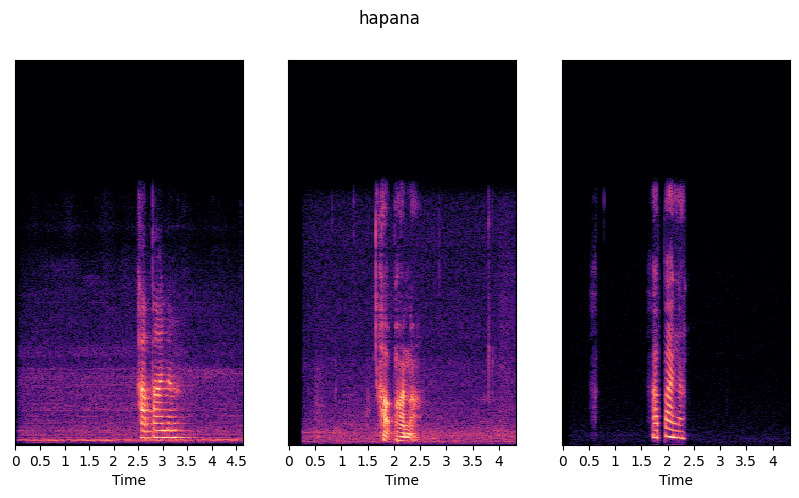

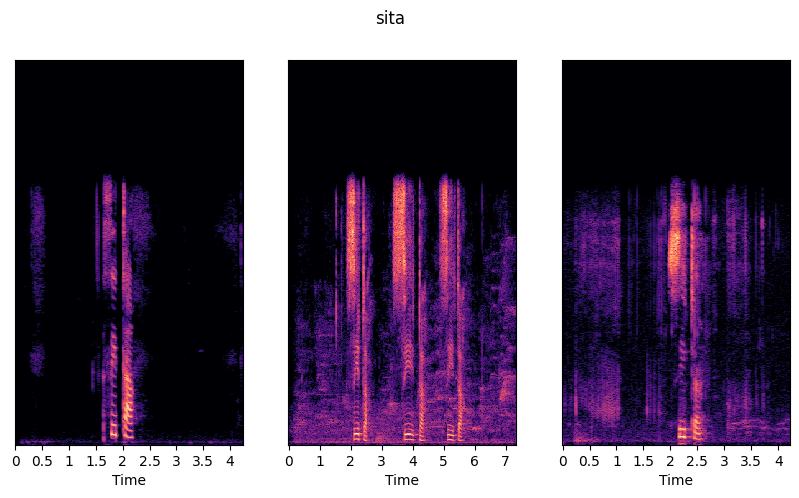

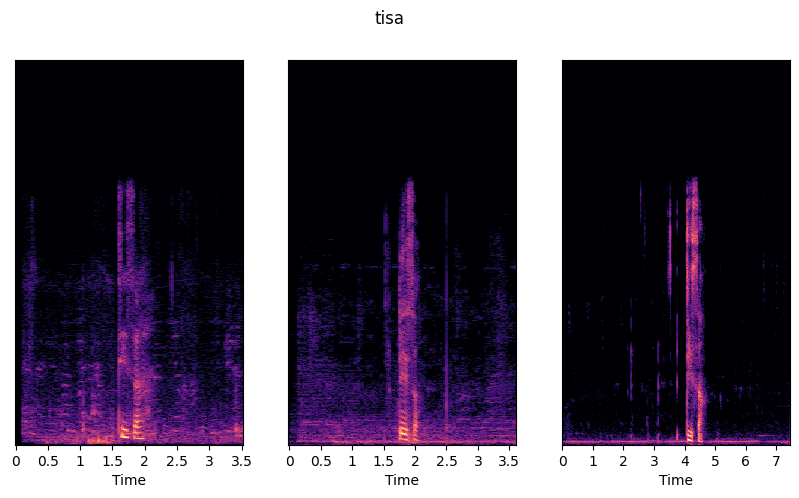

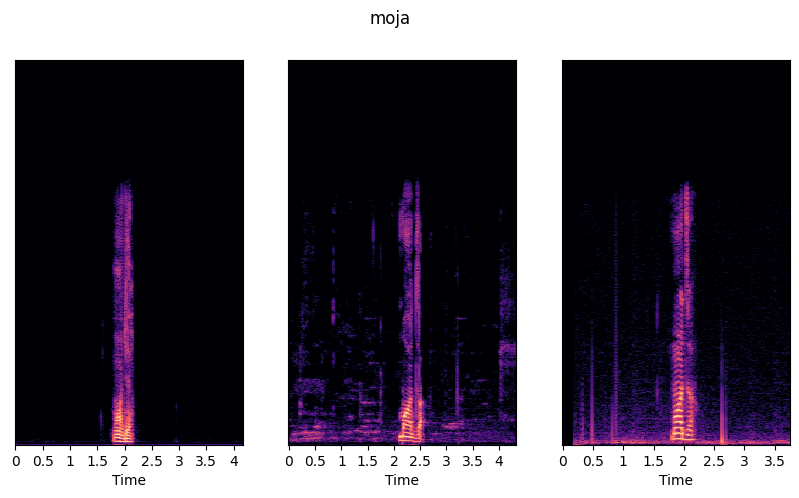

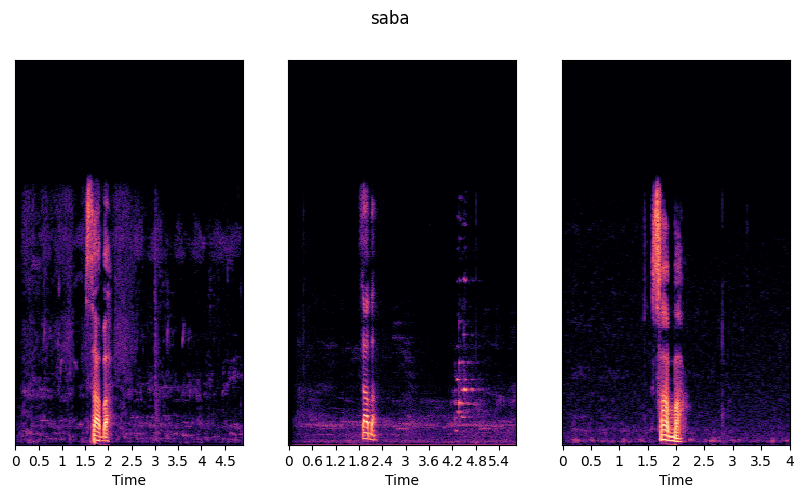

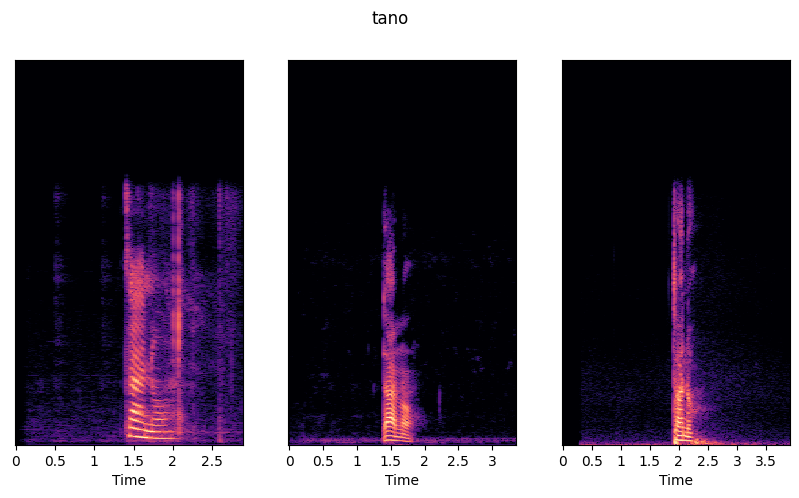

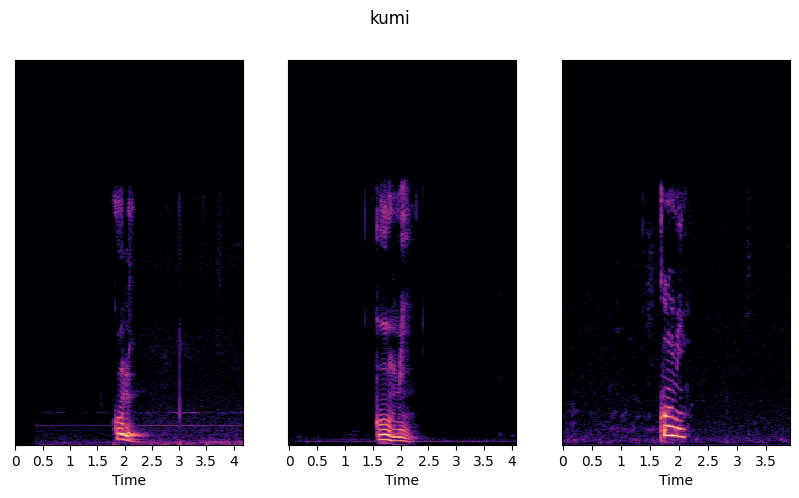

In [9]:
# show the three files of each word in frequency domain
for word in dict_samples:
    i=0
    fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
    fig.set_size_inches(10, 5)
    fig.suptitle(word)
    for audiofile in dict_samples[word]:
        x, sr = librosa.load('data/Swahili_words/'+audiofile)
        X = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
        img = librosa.display.specshow(X, x_axis='time', sr=sr, ax=ax[i])
        i+=1